In [ ]:
from neural_style_transfer_model import get_model, content_loss, gram_matrix, get_style_loss, compute_loss, compute_gradients, run_style_transfer

## Neural Style Transfer

This notebook demonstrates the process of Neural Style Transfer using the VGG19 model. The model and training functions are imported from `neural_style_transfer_model.py`. In this notebook, I focused on preprocessing, configuration, and visualization.

In [42]:
content_path = '/kaggle/input/nst-shivuwu/lfc.jpeg'
style_path = '/kaggle/input/nst-shivuwu/starry_night.jpeg'


In [43]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

In [44]:
import tensorflow as tf

## Visualization of Content & Style Image


In [45]:
def load_image(path):
    img = Image.open(path)
    max_dim_image = max(img.size)
    max_dims = 512   #to make image as compatible to a batch dimension

    scale_value = max_dims/max_dim_image

    img = img.resize((round(img.size[0]*scale_value), round(img.size[1]*scale_value)), Image.LANCZOS)
    
    img = tf.keras.utils.img_to_array(img)

    img = np.expand_dims(img, axis = 0)  #making it in a batch shape (x,y,z)

    return img


In [46]:
def imshow(img, label = None):
    #squeezing the batch dimension of size 1
    out = np.squeeze(img, axis = 0)
    out = out.astype(np.uint8) #normalising the array entries to (0,255)
    plt.imshow(out)
    if label is not None:
        plt.title(label)
    
    plt.imshow(out)
        

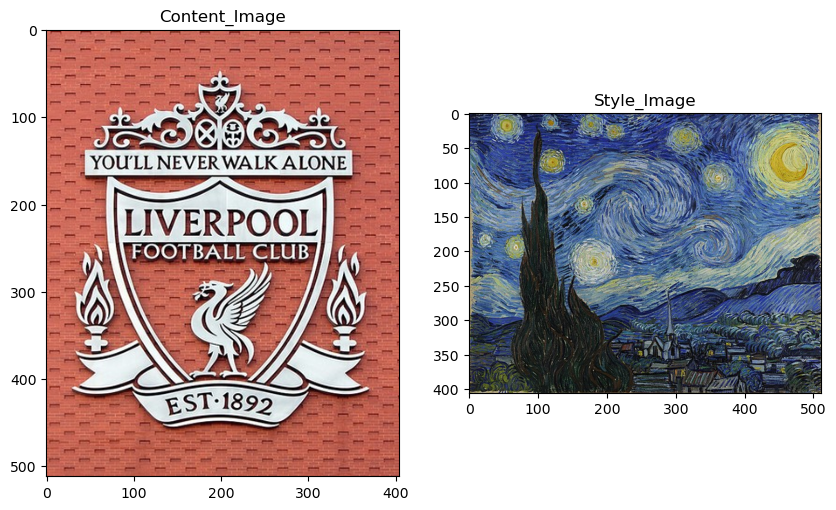

In [47]:
with tf.device(':/GPU:0'):
    plt.figure(figsize= (10,10))

    content = load_image(content_path).astype(np.uint8)
    style = load_image(style_path).astype(np.uint8)

    plt.subplot(1,2,1)
    imshow(content, 'Content_Image')

    plt.subplot(1,2,2)
    imshow(style, 'Style_Image')
    plt.show()

# DATA PROCESSING


In [48]:
def load_process_img(path):
    img = load_image(path)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In [49]:
def invert_process(processed_img):
    x = processed_img.copy()

    x = np.squeeze(x,0) #squeezing the batch_dimension
    
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]   #reversing the entries of the array

    x = np.clip(x,0,255).astype(np.uint8)
    return x


In [50]:
load_process_img(style_path).shape

(1, 406, 512, 3)

In [51]:
content_layer = ['block4_conv2']        #content layer from where feature map will be called

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1'
                ]

num_content_layer = len(content_layer)
num_style_layers = len(style_layers) 

In [55]:
def get_feature_representations(model, content_path, style_path):

    content_image = load_process_img(content_path)
    style_image = load_process_img(style_path)

    style_outputs = model(style_image)
    content_outputs = model(content_image)

    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_lyr[0] for content_lyr in content_outputs[num_style_layers:]]

    return style_features, content_features


## Calling The Model

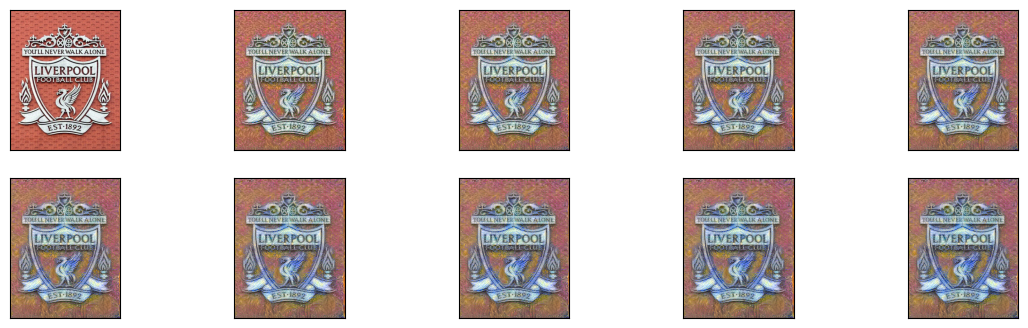

In [59]:
with tf.device(':/GPU:0'):
    best, best_loss = run_style_transfer(content_path= content_path,
                                        style_path = style_path, num_iterations= 1500)

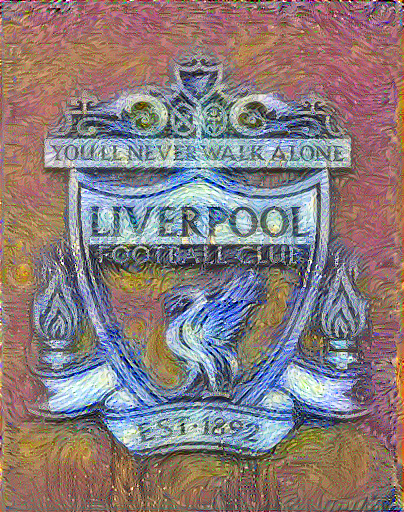

In [60]:
Image.fromarray(best)

In [61]:
best_img = Image.fromarray(best)
best_img.save('StarryPool.jpeg')

In [62]:
def show_results(best_img, content_path, style_path, show_large_final=True):
  plt.figure(figsize=(10, 5))
  content = load_image(content_path)
  style = load_image(style_path)

  plt.subplot(1, 2, 1)
  imshow(content, 'Content Image')

  plt.subplot(1, 2, 2)
  imshow(style, 'Style Image')

  if show_large_final:
    plt.figure(figsize=(10, 10))

    plt.imshow(best_img)
    plt.title('Output Image')
    plt.show()

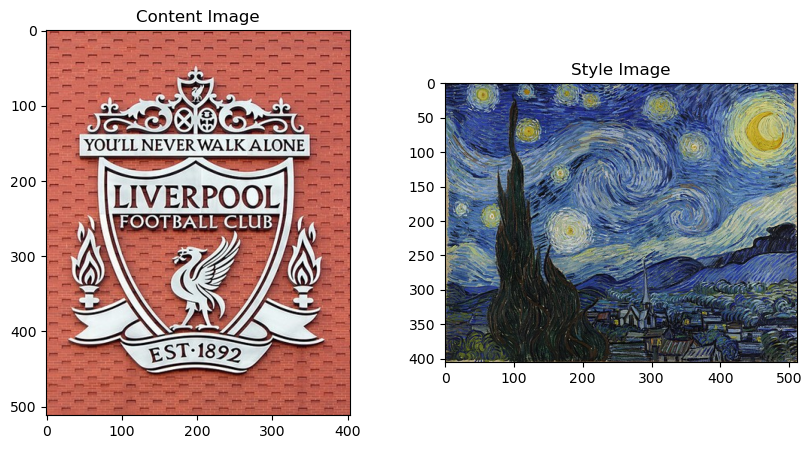

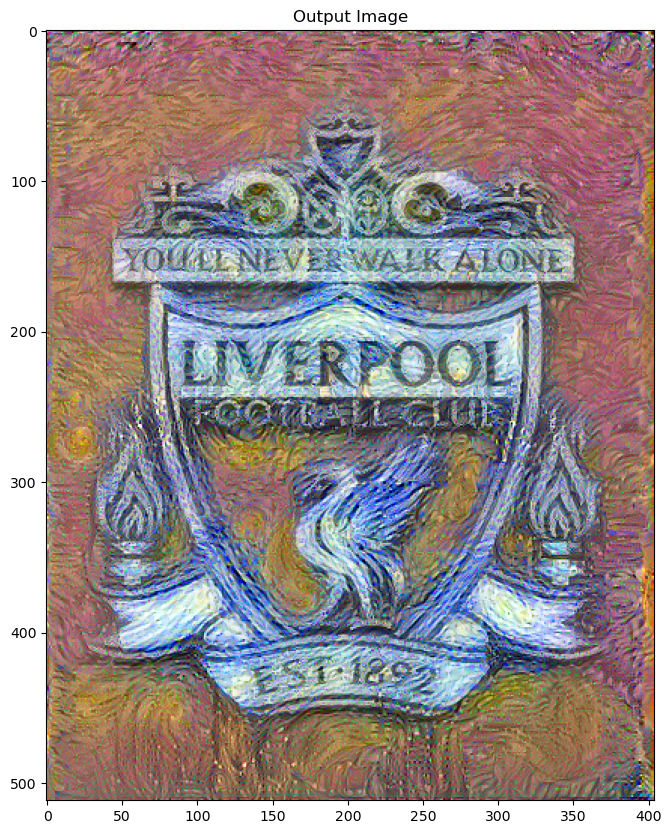

In [63]:
show_results(best, content_path, style_path)